In [1]:
#Trzeba zacząć xd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("depresja_z_kaggla.csv").drop(columns='id')

data

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


dane zawierają informacje osób na temat: <br>
płci,<br>
wieku (18-59),<br>
miasto (w Indiach xd),<br>
presja akademicka w skali(0-5),<br>
presja w pracy (0-5),<br>
CGPA - jakiś hinduski system na studiach w skali 0-10 (średnia ważona wszystkich ocen),<br>
staysfakcja ze studiów i pracy,<br>
ilość snu,<br>
nawyki żywieniowe,<br>
stopień naukowy,<br>
czy chciał skoczyć na bungee bez liny,<br>
ile godzin pracuje/studiuje(0-12),<br>
stress finansowy (0-),<br>
czy rodzina była psychicznie chora,<br>
target - depresja.<br>
Część danych to tekst cześć to liczby zmiennoprzecinkowe<br>
Wierszy z danymi jest 27901<br>

In [3]:
data.dtypes

Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                          object
Family History of Mental Illness          object
Depression                                 int64
dtype: object

In [4]:
data.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [5]:
data.describe(include='object')

,Gender,City,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Financial Stress,Family History of Mental Illness
count,27901,27901,27901,27901,27901,27901,27901,27901,27901
unique,2,52,14,5,4,28,2,6,2
top,Male,Kalyan,Student,'Less than 5 hours',Unhealthy,'Class 12',Yes,5.0,No
freq,15547,1570,27870,8310,10317,6080,17656,6715,14398


<h3>Tutaj może się w przyszłości to opisze te dane ale teraz mi sie nie chce

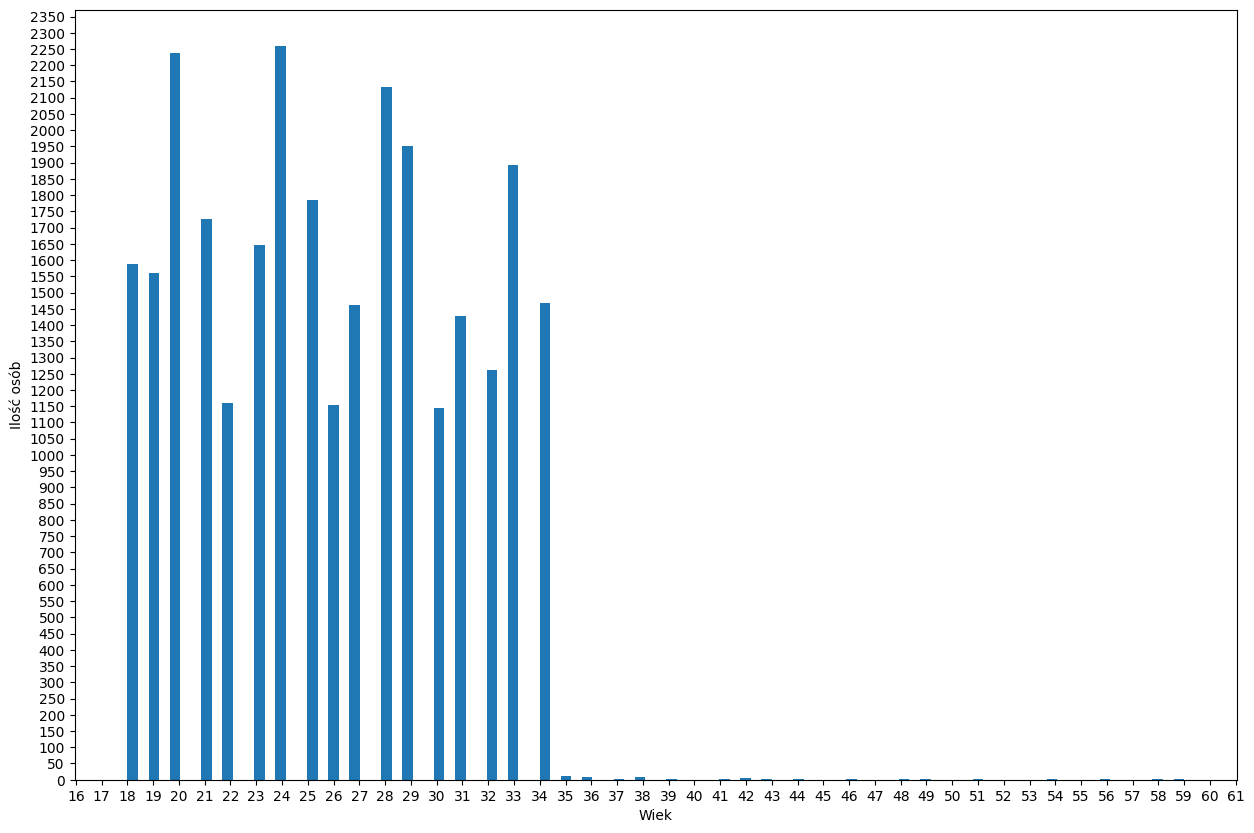

In [9]:

plt.figure(figsize=(15,10))
plt.hist(data['Age'], bins=100)
plt.ylabel('Ilość osób')
plt.xlabel('Wiek')
plt.locator_params('both', nbins=50)



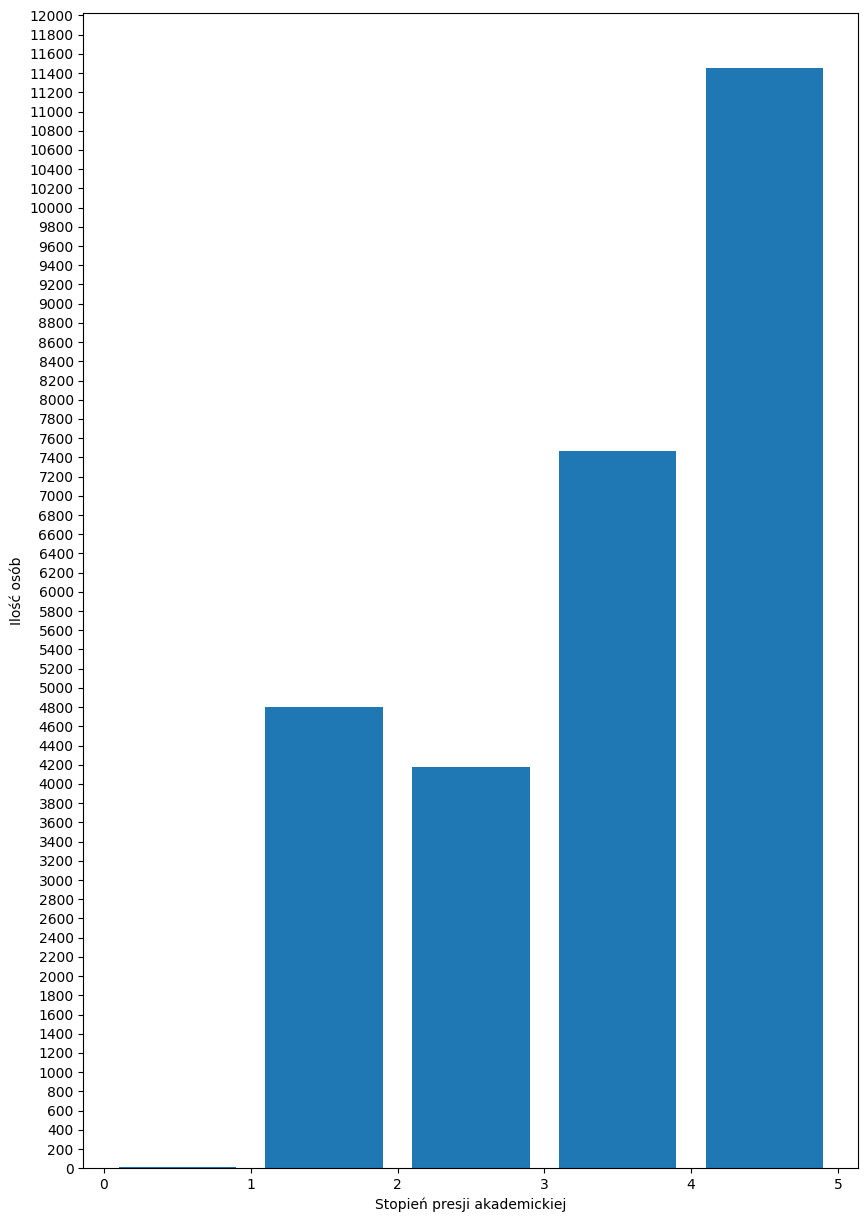

In [50]:

plt.figure(figsize=(10,15))
plt.hist(data['Academic Pressure'], bins=5, rwidth=0.8)
plt.ylabel('Ilość osób')
plt.xlabel('Stopień presji akademickiej')
plt.locator_params('x', nbins=10)
plt.locator_params('y', nbins=100)

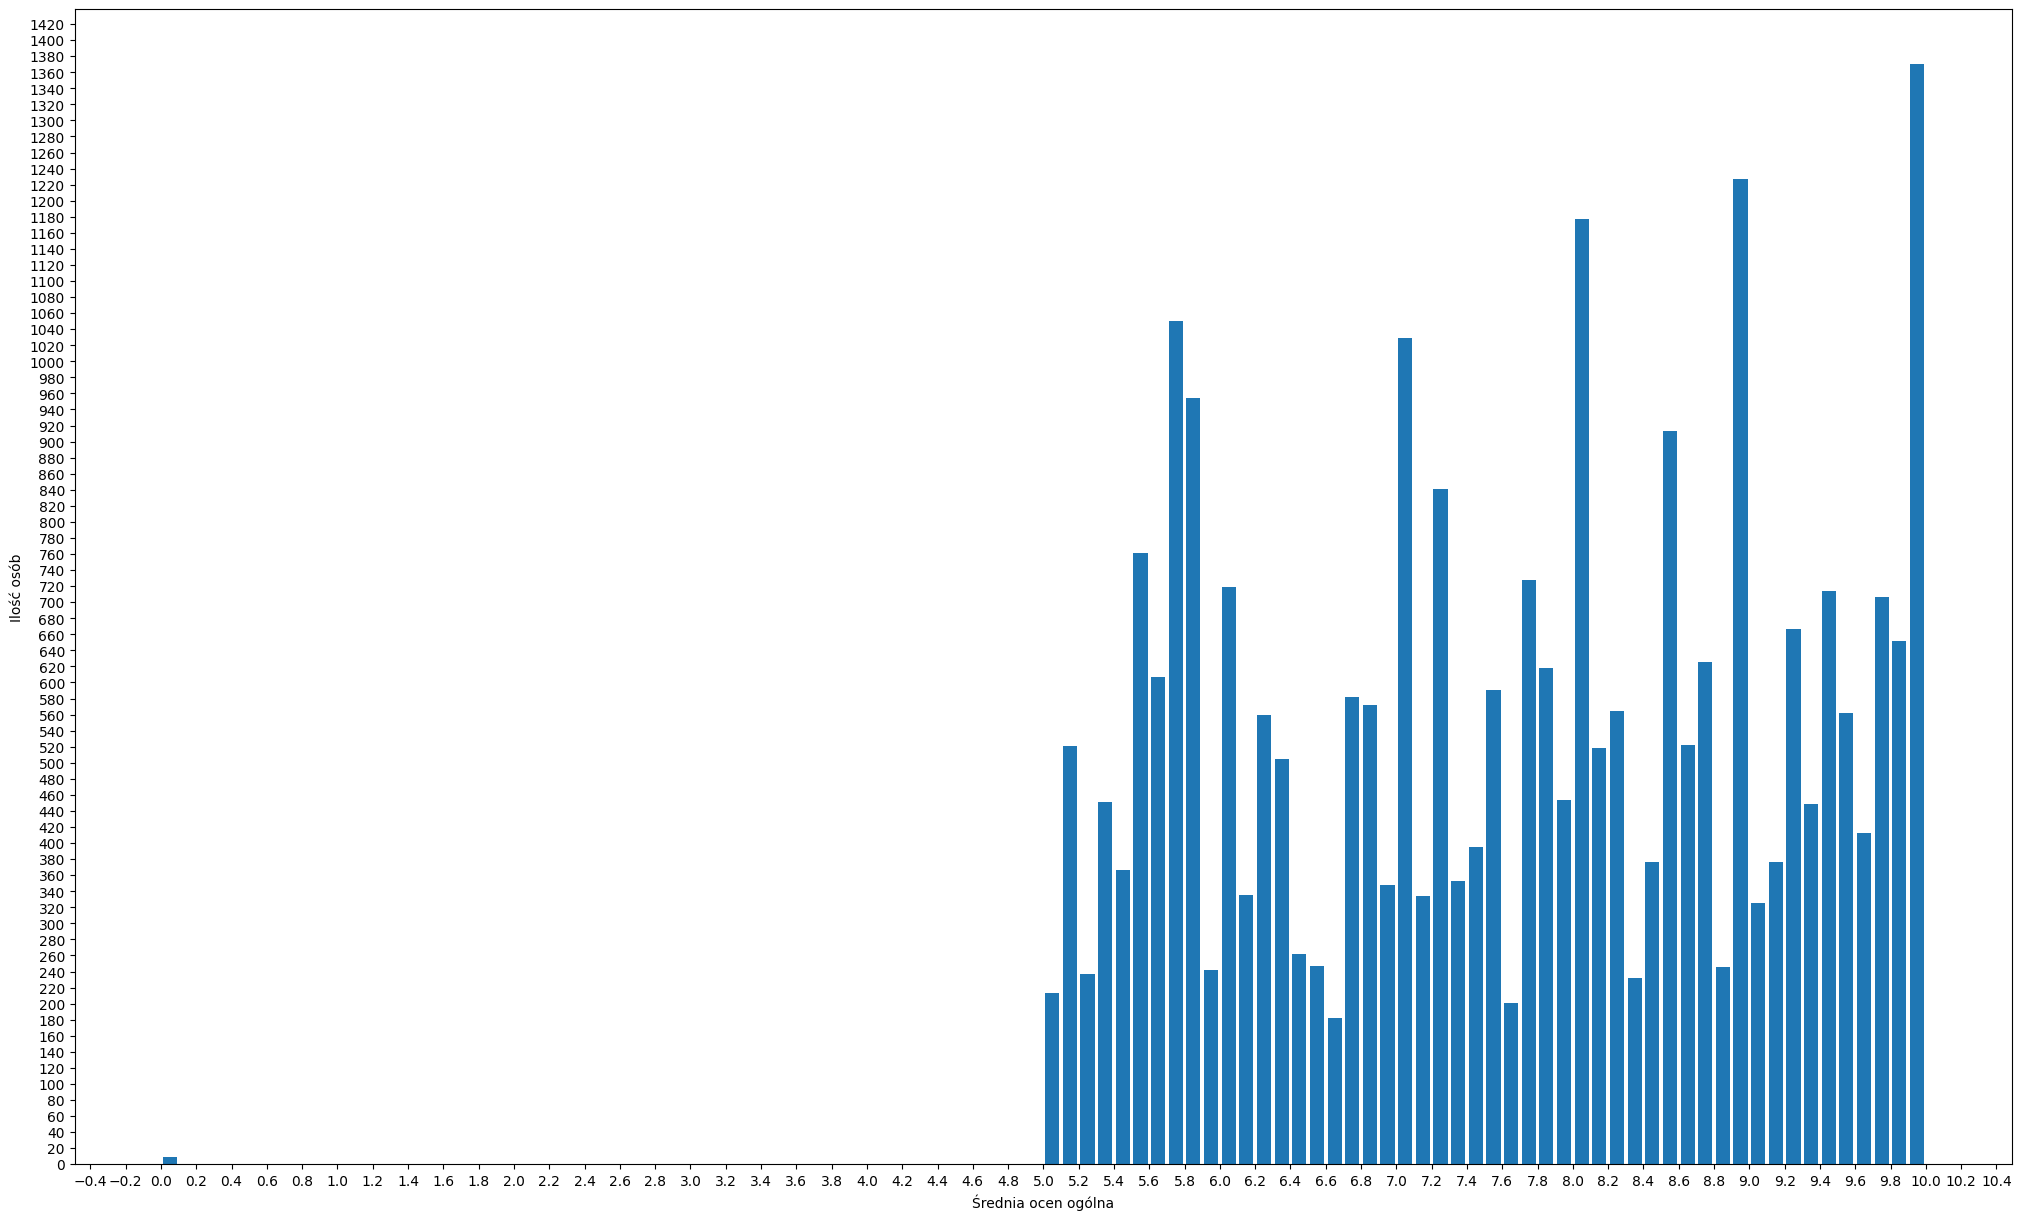

In [38]:
plt.figure(figsize=(25,15))
plt.hist(data['CGPA'], bins=100, rwidth=0.8)
plt.ylabel('Ilość osób')
plt.xlabel('Średnia ocen ogólna')
plt.locator_params('x', nbins=100)
plt.locator_params('y', nbins=100)

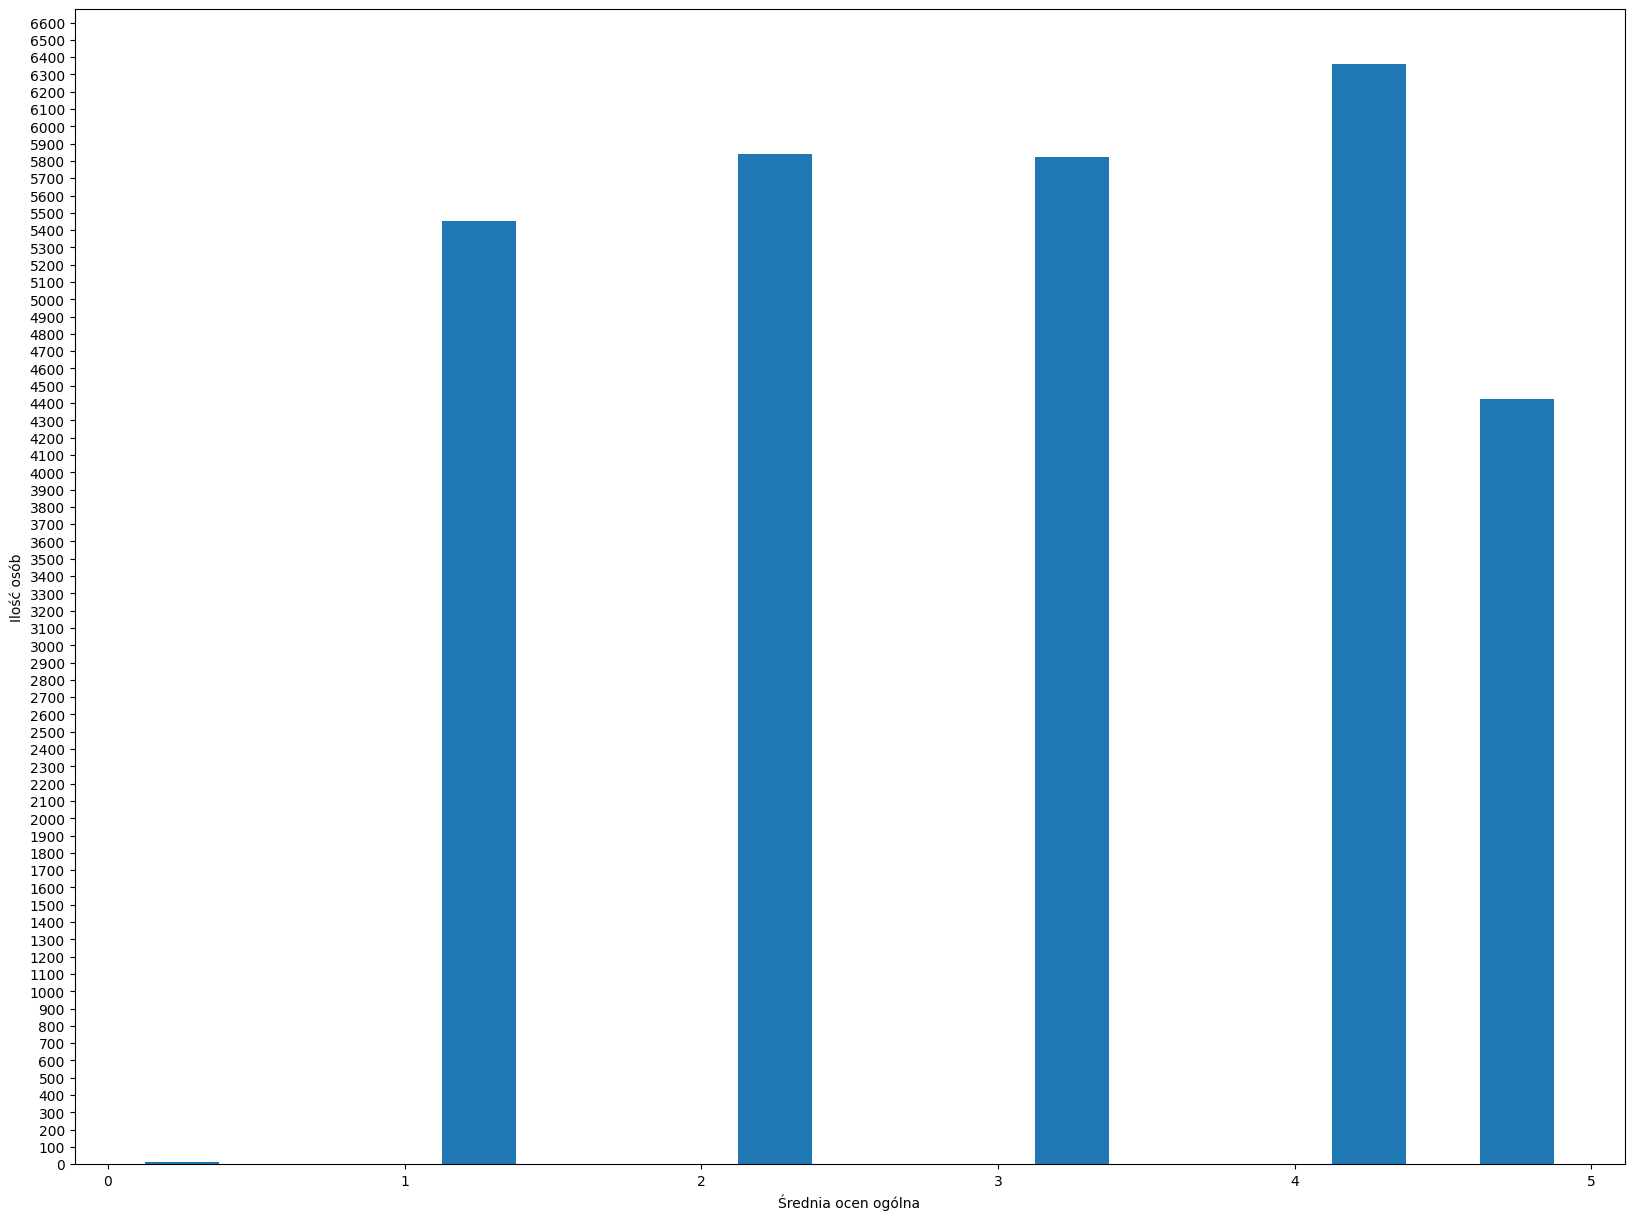

In [68]:
plt.figure(figsize=(20,15))
plt.hist(data['Study Satisfaction'], bins=10, rwidth=0.5)
plt.ylabel('Ilość osób')
plt.xlabel('Średnia ocen ogólna')
plt.locator_params('x', nbins=10)
plt.locator_params('y', nbins=100)

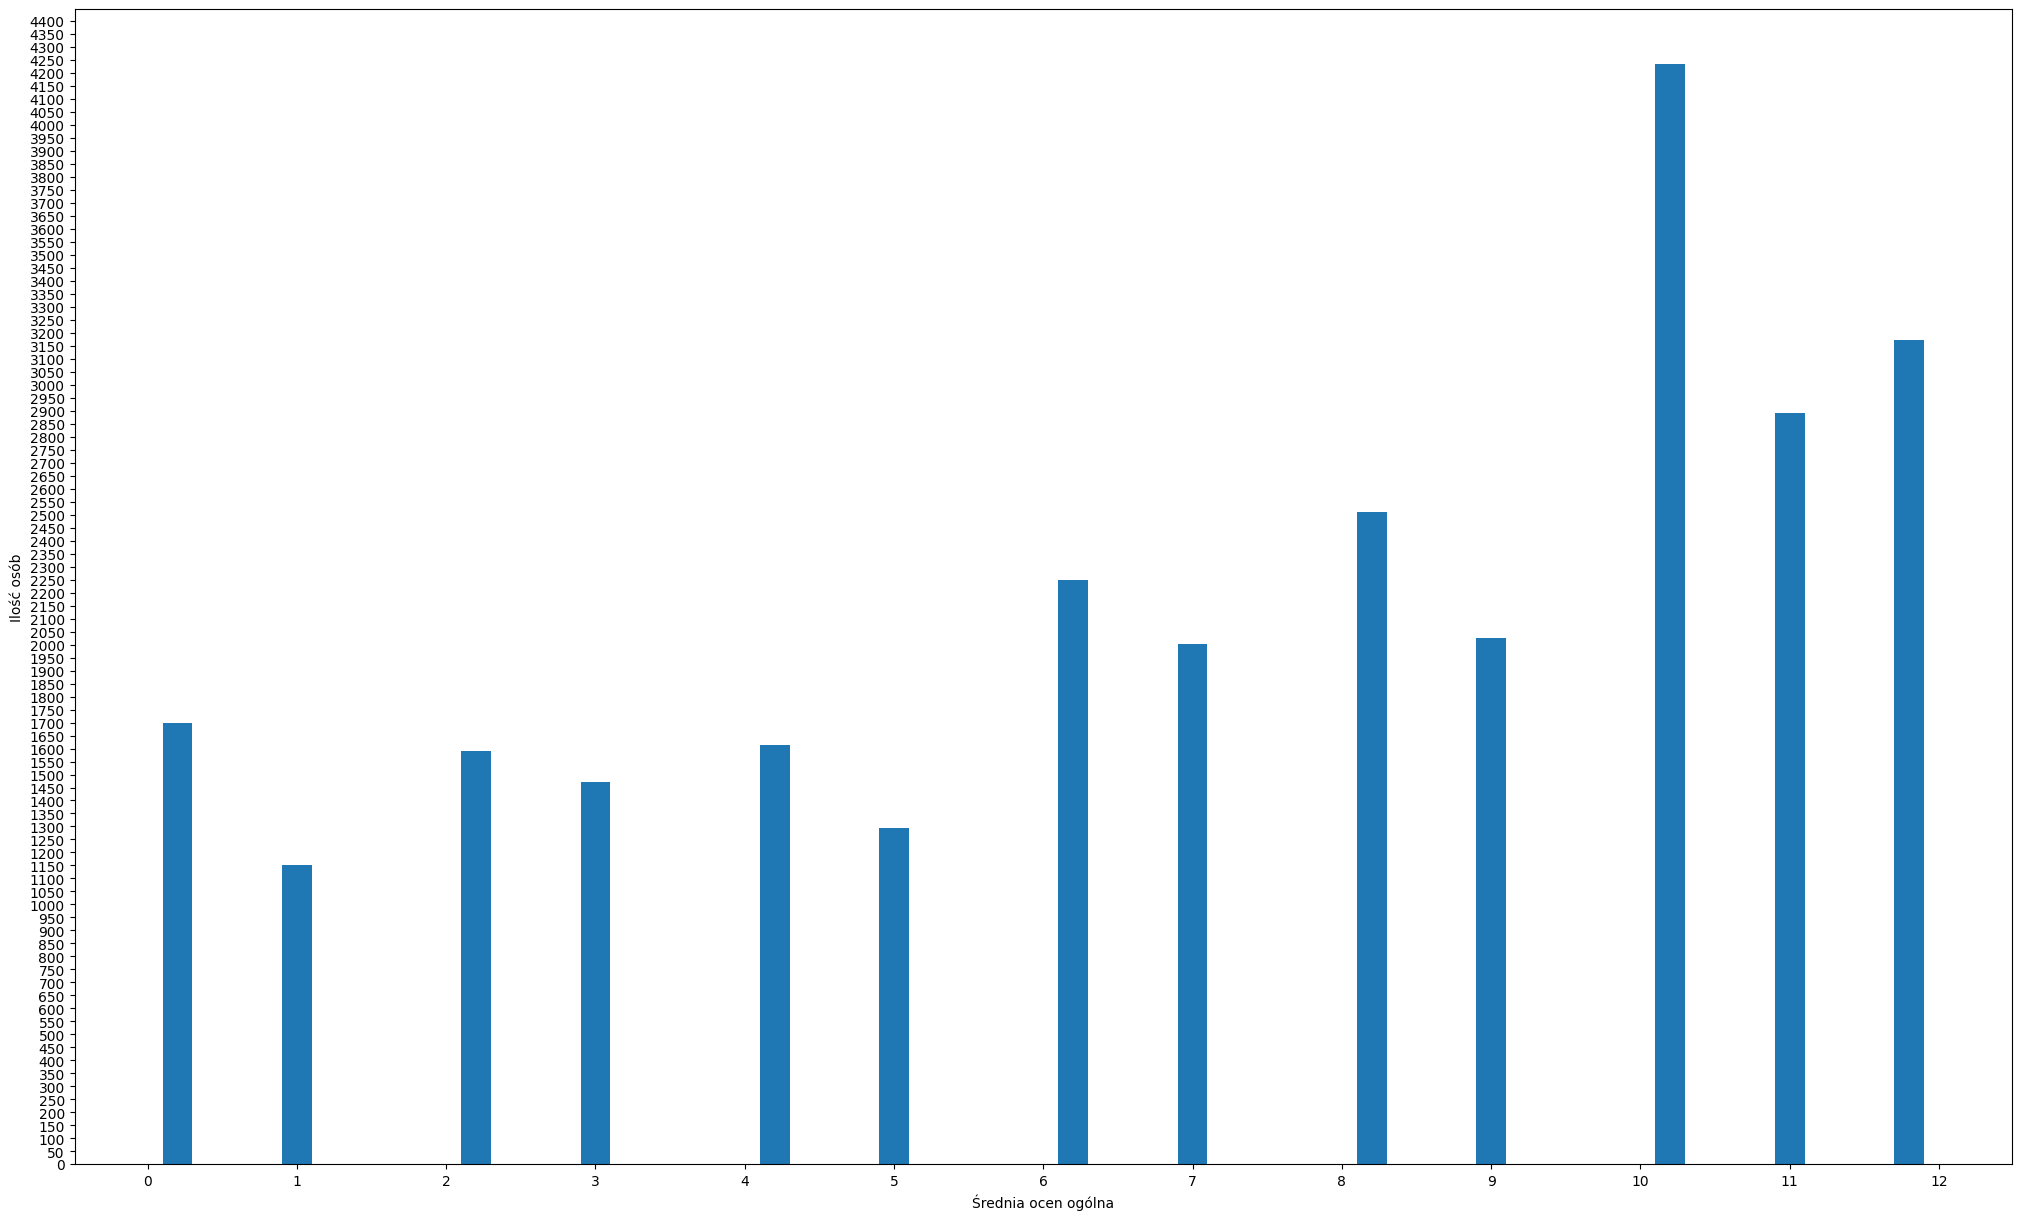

In [69]:
plt.figure(figsize=(25,15))
plt.hist(data['Work/Study Hours'], bins=30, rwidth=0.5)
plt.ylabel('Ilość osób')
plt.xlabel('Średnia ocen ogólna')
plt.locator_params('x', nbins=20)
plt.locator_params('y', nbins=100)

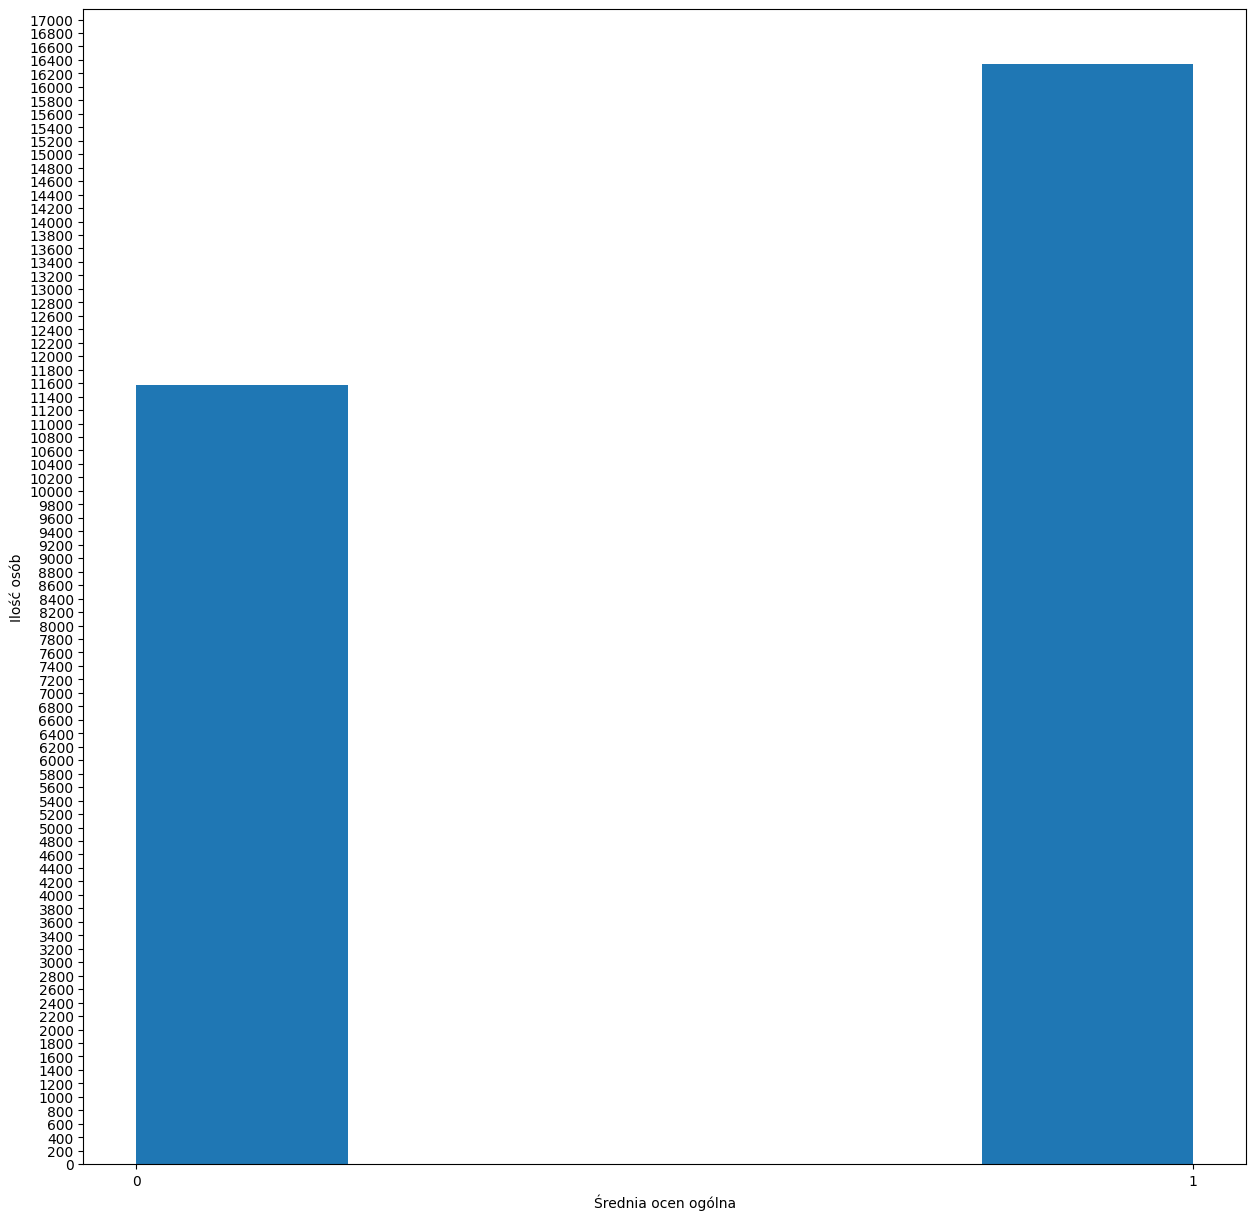

In [83]:
plt.figure(figsize=(15,15))
plt.hist(data['Depression'], bins=5)
plt.ylabel('Ilość osób')
plt.xlabel('Średnia ocen ogólna')
plt.locator_params('x', nbins=1)
plt.locator_params('y', nbins=100)